## Multiple Logistic Regression

In [549]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [550]:
# Logistic Regression
# Initialize X,y,w,b

X = np.array([0,1,2,3,4,6])
y = np.array([0,0,1,0,1,1])
w = 2 
b = -3

In [551]:
# Predict y given X, w, b

def sigmoid(z):
	return (1/(1 + np.exp(-z)))

In [552]:
def predict_y(X,w,b):
	m = X.shape[0]
	y_probs = np.zeros(m)

	for i in range(m):
		y_probs[i] = sigmoid(w*X[i]+b)
	
	y_preds = np.where(y_probs >= 0.5, 1, 0)
	return y_preds, y_probs

In [553]:
y_preds, y_probs = predict_y(X,w,b)

In [554]:
y_preds, y_probs

(array([0, 0, 1, 1, 1, 1]),
 array([0.04742587, 0.26894142, 0.73105858, 0.95257413, 0.99330715,
        0.99987661]))

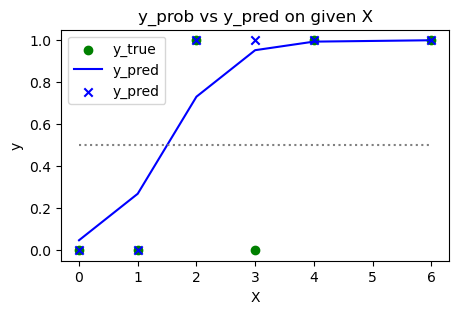

In [555]:
plt.figure(figsize=(5,3))
plt.scatter(X,y,color="g",label="y_true")
plt.plot(X,y_probs,color="b",label="y_pred")
plt.scatter(X,y_preds,color="b",label="y_pred", marker="x")
plt.plot([X.min(), X.max()], [0.5]*2, linestyle="dotted", color="grey")
plt.xlabel("X")
plt.ylabel("y")
plt.title("y_prob vs y_pred on given X")
plt.legend()


In [556]:
def cost(X,y,w,b, epsilon = 1e-5):
	y_preds, y_prob = predict_y(X,w,b)
	m = X.shape[0]
	cost = 0

	for i in range(m):
		log_loss = ((-y[i]*np.log(y_prob[i]+epsilon)) - ((1-y[i])*np.log((1-y_prob[i])+epsilon)))	#since log = 0 is undefined
		cost += log_loss

	return cost/m


In [557]:
def calc_cost(X,y,w,b, epsilon=1e-5):
	m = X.shape[0]
	cost = 0

	for i in range(m):
		z = w*X[i]+b
		f_wb = sigmoid(z)
		log_loss = ((-y[i]*np.log(f_wb + epsilon))-((1-y[i])*np.log(1-f_wb+epsilon)))
		cost += log_loss

	return cost/m
	

The calc_cost (v2) approach is superior because it integrates the prediction and cost calculation into a single loop.Reduced Overhead: By calculating the raw input ($z = w \cdot X[i] + b$), the probability ($\hat{y} = \text{sigmoid}(z)$), and the cost all inside the main for loop, you avoid the overhead of calling and returning from the predict_y function for every cost calculation iteration.Optimized Structure: When performing gradient descent, you only need the current cost; you don't need the final array of predictions ($\hat{y}$) until you want to evaluate the model's performance. Calculating cost one sample at a time is the most direct way to implement the formula.

In [558]:
cost(X,y,w,b)

0.6217113453317057

In [559]:
calc_cost(X,y,w,b)

0.6217113453317057

In [560]:
calc_cost(X,y,w-1,b)

0.4239450100399033

In [561]:
calc_cost(X,y,w-2,b)

1.5484766860947696

In [562]:
calc_cost(X,y,w+1,b)

1.1314706914305448

In [563]:
calc_cost(X,y,w+2,b)

1.7151146644257216

In [564]:
calc_cost(X,y,w+3,b)

2.2017089592926498

In [565]:
X.shape[0]

6

In [566]:
# Gradient Descent
def calc_gradient(X,y,w,b):
	m = X.shape[0]

	dJ_db = 0
	dJ_dw = 0

	for i in range(m):
		dJ_dw += (sigmoid(w*X[i]+b) - y[i])*X[i]
		dJ_db += sigmoid(w*X[i]+b) - y[i]
	
	return dJ_dw/m, dJ_db/m

In [567]:
dJ_dw, dJ_db = calc_gradient(X,y,w,b)

In [568]:
dJ_dw, dJ_db

(0.426878197990708, 0.16553062574995486)

In [569]:
print(f"Initial w:{w}\tInitial b:{b}\tInitial Cost:{calc_cost(X,y,w,b)}")

print(f"dJ/dw={dJ_dw}\tdJ/db={dJ_db}")

alpha=0.01

w_new = w - alpha*dJ_dw
b_new = b - alpha*dJ_db
print(f"w_new={w_new}\tb_new={b_new}\tInitial Cost:{calc_cost(X,y,w_new,b_new)}")

Initial w:2	Initial b:-3	Initial Cost:0.6217113453317057
dJ/dw=0.426878197990708	dJ/db=0.16553062574995486
w_new=1.995731218020093	b_new=-3.0016553062574998	Initial Cost:0.6196188530626964


In [570]:
def gradient_descent(X,y,w,b,alpha=0.01, iter=1000,step=100):
	history={}
	best_b = b
	best_w = w
	best_cost = calc_cost(X,y,w,b)
	
	for i in range(iter):
		dJ_dw,dJ_db=calc_gradient(X,y,w,b)
		w = w - (alpha*dJ_dw)
		b = b - (alpha*dJ_db)

		if i % step == 0:
			cost = calc_cost(X,y,w,b)
			history[i] = cost
			if cost < best_cost:
				best_w = w
				best_b = b
				best_cost = cost
			print(f"Epoch:{i}\tw={w}\tb={b}\tCost:{cost}\tMin Cost:{best_cost}\tbest_w={best_w}\tbest_b={best_b}")

	return history,w,b,best_w,best_b

In [571]:
history,w,b,best_w,best_b = gradient_descent(X,y,w,b)

Epoch:0	w=1.995731218020093	b=-3.0016553062574998	Cost:0.6196188530626964	Min Cost:0.6196188530626964	best_w=1.995731218020093	best_b=-3.0016553062574998
Epoch:100	w=1.6393624796273907	b=-3.1328898033284633	Cost:0.4735965086316332	Min Cost:0.4735965086316332	best_w=1.6393624796273907	best_b=-3.1328898033284633
Epoch:200	w=1.4274008133662524	b=-3.202084300020502	Cost:0.4222697608041695	Min Cost:0.4222697608041695	best_w=1.4274008133662524	best_b=-3.202084300020502
Epoch:300	w=1.325875872101328	b=-3.2295848686630557	Cost:0.41060197166900286	Min Cost:0.41060197166900286	best_w=1.325875872101328	best_b=-3.2295848686630557
Epoch:400	w=1.2832396332570366	b=-3.2364053151195886	Cost:0.40861185893134055	Min Cost:0.40861185893134055	best_w=1.2832396332570366	best_b=-3.2364053151195886
Epoch:500	w=1.2657578469573072	b=-3.2347510436507108	Cost:0.4082839141537729	Min Cost:0.4082839141537729	best_w=1.2657578469573072	best_b=-3.2347510436507108
Epoch:600	w=1.2579678013232503	b=-3.2299649150924283	Cos

In [572]:
def plot_hist(history):
	plt.figure(figsize=(4,3))
	plt.plot(history.keys(), history.values())
	plt.title("Cost over iteration")
	plt.xlabel("Iteration")
	plt.ylabel("Cost")

In [573]:
print(history)

{0: 0.6196188530626964, 100: 0.4735965086316332, 200: 0.4222697608041695, 300: 0.41060197166900286, 400: 0.40861185893134055, 500: 0.4082839141537729, 600: 0.4081976203922892, 700: 0.4081454581212511, 800: 0.4080993822139762, 900: 0.4080556690051818}


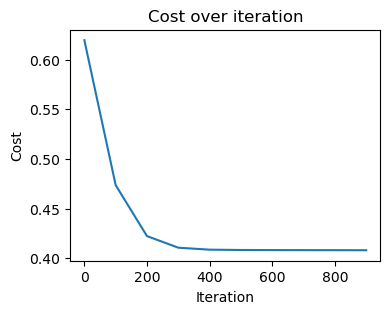

In [574]:
plot_hist(history)

In [575]:
# Multiple Logistic Regression

In [576]:


# Initialize X,y,w,b

X = np.array([
	[1,4],
	[3,1],
	[5,2],
	[7,3],
])

y = np.array([1,0,0,1])

w = np.array([1,2])
b = -3

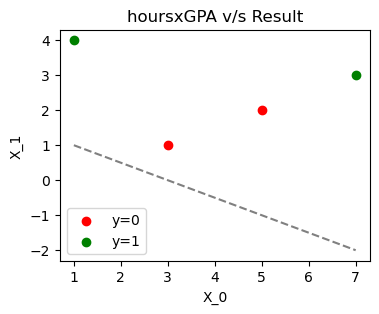

In [577]:
plt.figure(figsize=(4,3))
plt.scatter(X[:,0][y==0],X[:,1][y==0],color="r",label="y=0")
plt.scatter(X[:,0][y==1],X[:,1][y==1],color="g",label="y=1")
plt.legend()
plt.title("hoursxGPA v/s Result")
plt.ylabel("X_1")
plt.xlabel("X_0")

# decision boundary
X_0 = np.array([X[:,0].min(),X[:,0].max()])
X_1 = -((w[0]*X_0)+b)/w[1]
plt.plot(X_0,X_1,linestyle="dashed",color="gray",label="boundary")

In [578]:
def predict_y(X,w,b):
	m = X.shape[0]

	y_probs = np.zeros(m)

	for i in range(m):
		z = np.dot(w,X[i]) + b
		fwb = sigmoid(z)
		y_probs[i] = fwb

	y_preds = np.where(y_probs >= 0.5, 1, 0)
	return y_preds, y_probs

In [579]:
y_preds, y_probs = predict_y(X,w,b)
y_preds, y_probs

(array([1, 1, 1, 1]), array([0.99752738, 0.88079708, 0.99752738, 0.9999546 ]))

In [580]:
# Cost function

def calc_cost(X,y,w,b, epsilon=1e-5):
	m = X.shape[0]
	cost = 0
	for i in range(m):
		z = np.dot(w, X[i]) + b
		fwb = sigmoid(z)
		log_loss = np.log(fwb + epsilon)
		log_loss_ = np.log(1-fwb + epsilon)
		cost += (-y[i])*log_loss - (1 - y[i])*log_loss_
	
	return cost/m

In [581]:
calc_cost(X,y,w,b)

2.031946184062107

In [582]:
X.shape[0]


4

In [583]:
X.shape[1]

2

In [584]:
def calc_grad(X,y,w,b):
	m = X.shape[0]
	n = X.shape[1]
	dJ_dw = np.zeros(n)
	dJ_db = 0

	for i in range(m):
		z = np.dot(w,X[i]) + b
		fwb = sigmoid(z)
		error = fwb - y[i]
		dJ_dw += error*X[i]
		dJ_db += error
		
	return dJ_dw/m, dJ_db/m

In [585]:
dJ_dw, dJ_db = calc_grad(X,y,w,b)

dJ_dw, dJ_db

(array([1.90680943, 0.71645629]), 0.46895160844897765)

In [586]:
print(f"Initial w:{w}\tInitial b:{b}\tIntial Cost:{calc_cost(X,y,w,b)}")

alpha=0.1

w_new = w - alpha*dJ_dw
b_new = b - alpha*dJ_db


print(f"New w:{w_new}\tNew b:{b_new}\tNew Cost:{calc_cost(X,y,w_new,b_new)}")


Initial w:[1 2]	Initial b:-3	Intial Cost:2.031946184062107
New w:[0.80931906 1.92835437]	New b:-3.046895160844898	New Cost:1.6039032364702013


In [587]:
w

array([1, 2])

In [588]:
def gradient_descent(X,y,w,b,alpha=0.1, iter=1000, step=100):

	history = {}
	best_w = w.copy()
	best_b = b
	best_cost = calc_cost(X,y,w,b) 
	for i in range(iter):
		dJ_dw, dJ_db = calc_grad(X,y,w,b)
		w =w - alpha*dJ_dw
		b =b - alpha*dJ_db
		if i % step == 0:
			cost = calc_cost(X,y,w,b)
			history[i] = cost
			if cost < best_cost:
				best_cost = cost
				best_w = w.copy()
				best_b = b

			print(f"epoch={i}\tw={w}\tb={b}\tCost={cost}\tbest_w={best_w}\tbest_b={best_b}\tbest_cost={best_cost}")

	return history,w,b,best_w, best_b


In [589]:
history,w_, b_, best_w,best_b = gradient_descent(X,y,w,b)

epoch=0	w=[0.80931906 1.92835437]	b=-3.046895160844898	Cost=1.6039032364702013	best_w=[0.80931906 1.92835437]	best_b=-3.046895160844898	best_cost=1.6039032364702013
epoch=100	w=[-0.19635149  1.9694172 ]	b=-3.5991530340882423	Cost=0.21848727578846905	best_w=[-0.19635149  1.9694172 ]	best_b=-3.5991530340882423	best_cost=0.21848727578846905
epoch=200	w=[-0.24865461  2.2365615 ]	b=-3.947023109318254	Cost=0.1989286653119947	best_w=[-0.24865461  2.2365615 ]	best_b=-3.947023109318254	best_cost=0.1989286653119947
epoch=300	w=[-0.2820686   2.44814675]	b=-4.268912308269347	Cost=0.18396824004118595	best_w=[-0.2820686   2.44814675]	best_b=-4.268912308269347	best_cost=0.18396824004118595
epoch=400	w=[-0.30652093  2.62848892]	b=-4.5674734273195465	Cost=0.17173857818504676	best_w=[-0.30652093  2.62848892]	best_b=-4.5674734273195465	best_cost=0.17173857818504676
epoch=500	w=[-0.32582747  2.78799444]	b=-4.845875851860595	Cost=0.16140488776754924	best_w=[-0.32582747  2.78799444]	best_b=-4.84587585186059

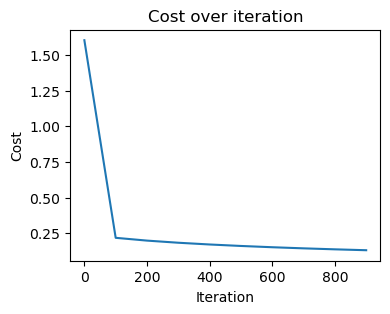

In [590]:
plot_hist(history)

In [591]:
y

array([1, 0, 0, 1])

In [596]:
def plot_true_vs_pred(X,y,w,b):
	y_preds, y_probs = predict_y(X,w,b)

	plt.figure(figsize=(4,3))
	plt.scatter(X[:,0][y==0],X[:,1][y==0],color="r",s=80, label="y=0", marker="x")
	plt.scatter(X[:,0][y==1],X[:,1][y==1],color="g",s=80, label="y=0", marker="x")
	plt.scatter(X[:,0][y_preds==1],X[:,1][y_preds==1],color="g",s=80, label="y_pred=1", marker="o")
	plt.scatter(X[:,0][y_preds==0],X[:,1][y_preds==0],color="r",s=80, label="y_pred=1", marker="o")

	X_0 = np.array([X[:,0].min(), X[:,0].max()])
	X_1 = -((w[0]*X_0) + b)/w[1]
	plt.plot(X_0, X_1, linestyle="dotted", color="grey", label="boundary")

	plt.legend()
	plt.title("y vs y_hat")
	plt.xlabel("X_0")
	plt.ylabel("X_1")

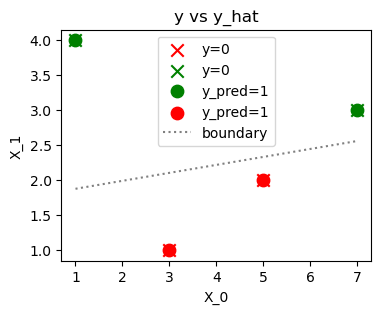

In [597]:
plot_true_vs_pred(X,y,w_,b_)